## **Customer Segementation**

**Import Library**

In [67]:
# general and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scaler
from sklearn.preprocessing import MinMaxScaler

#kmeans
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA 

# handling outliers
from feature_engine.outliers import Winsorizer

# Silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# metric
from sklearn.metrics import silhouette_score

# model saving
import joblib as joblib

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


pd.options.display.float_format = '{:.2f}'.format

# atur tampilan max column
pd.set_option("display.max_columns", None)

**Data Loading**

In [2]:

df = pd.read_csv("fashion-dataset-clean.csv")
df

,transaction_id,payment_method,payment_status,promo_amount,shipment_fee,total_amount,transaction_date,customer_id,first_name,last_name,gender,device_type,home_location_lat,home_location_long,home_location,age,product_id,quantity,item_price,product_gender,master_category,sub_category,article_type,base_color,season,year,usage,product_name
0,186e2bee-0637-4710-8981-50c2d737bc42,Debit Card,Success,1415,10000,199832,2018-07-29,5868,Titin,Pratiwi,F,Android,-6.12,106.88,Jakarta Raya,23,54728,1,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012,Casual,Vans Men Black Shoes
1,caadb57b-e808-4f94-9e96-8a7d4c9898db,Credit Card,Success,0,10000,155526,2018-07-30,4774,Uchita,Hassanah,F,Android,-3.60,120.36,Sulawesi Selatan,27,16193,1,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011,Casual,Puma Men Knitted Vest Green Sweater
2,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,OVO,Success,0,10000,550696,2018-09-15,4774,Uchita,Hassanah,F,Android,-3.60,120.36,Sulawesi Selatan,27,53686,4,135174,Women,Accessories,Bags,Handbags,Purple,Summer,2012,Casual,Kiara Women Purple & Yellow Handbag
3,f5e530a7-4350-4cd1-a3bc-525b5037bcab,Credit Card,Success,0,0,271012,2018-11-01,4774,Uchita,Hassanah,F,Android,-3.60,120.36,Sulawesi Selatan,27,20228,1,271012,Women,Apparel,Topwear,Sweaters,Red,Fall,2011,Casual,Wrangler Women Cable Red Sweater
4,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,Credit Card,Success,0,0,198753,2018-12-18,4774,Uchita,Hassanah,F,Android,-3.60,120.36,Sulawesi Selatan,27,55220,1,198753,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253521,66f02fa4-c62e-497a-8b6e-be239009b50a,Debit Card,Failed,0,0,226820,2021-09-21,25121,Himawan,Kurniawan,M,Android,-6.87,111.08,Jawa Tengah,30,30642,2,113410,Men,Apparel,Topwear,Tshirts,White,Summer,2012,Casual,Nike Men Printed White T-shirt
1253522,ccde6b83-ee42-4cce-b2cd-976574886eac,OVO,Success,5010,10000,359203,2021-12-09,34829,Salwa,Prastuti,F,Android,-2.27,120.42,Sulawesi Selatan,17,19394,1,354213,Men,Apparel,Topwear,Jackets,Blue,Summer,2011,Casual,ADIDAS Men Solid Blue Jacket
1253523,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,Credit Card,Success,2181,5000,1158159,2021-12-11,99645,Tania,Palastri,F,Android,-6.19,106.83,Jakarta Raya,32,13079,4,288835,Men,Footwear,Shoes,Casual Shoes,White,Fall,2011,Casual,Numero Uno Men White Casual Shoes
1253524,af7f291a-b01b-4bfd-89a9-237b16368b15,Credit Card,Success,4503,0,184143,2019-12-18,87319,Winda,Suryatmi,F,iOS,-7.16,110.89,Jawa Tengah,16,11312,1,188646,Men,Apparel,Bottomwear,Trousers,Beige,Fall,2011,Casual,Scullers Men Rugged Chinos Beige Trousers


Missing Value Checking

In [3]:
df.isna().sum()

transaction_id        0
payment_method        0
payment_status        0
promo_amount          0
shipment_fee          0
total_amount          0
transaction_date      0
customer_id           0
first_name            0
last_name             0
gender                0
device_type           0
home_location_lat     0
home_location_long    0
home_location         0
age                   0
product_id            0
quantity              0
item_price            0
product_gender        0
master_category       0
sub_category          0
article_type          0
base_color            0
season                0
year                  0
usage                 0
product_name          0
dtype: int64

### **EDA**

##### 1. Shopping tendencies for fashion products based on the type of device used.

In [4]:
by_device = df.groupby('device_type')['total_amount'].sum().reset_index()
by_device

,device_type,total_amount
0,Android,1142148350328
1,iOS,338996500461


Insight: Android users tend to spend more on fashion e-commerce compared to iOS users, primarily because there are more Android users in this dataset.

##### 2. Age Distribution

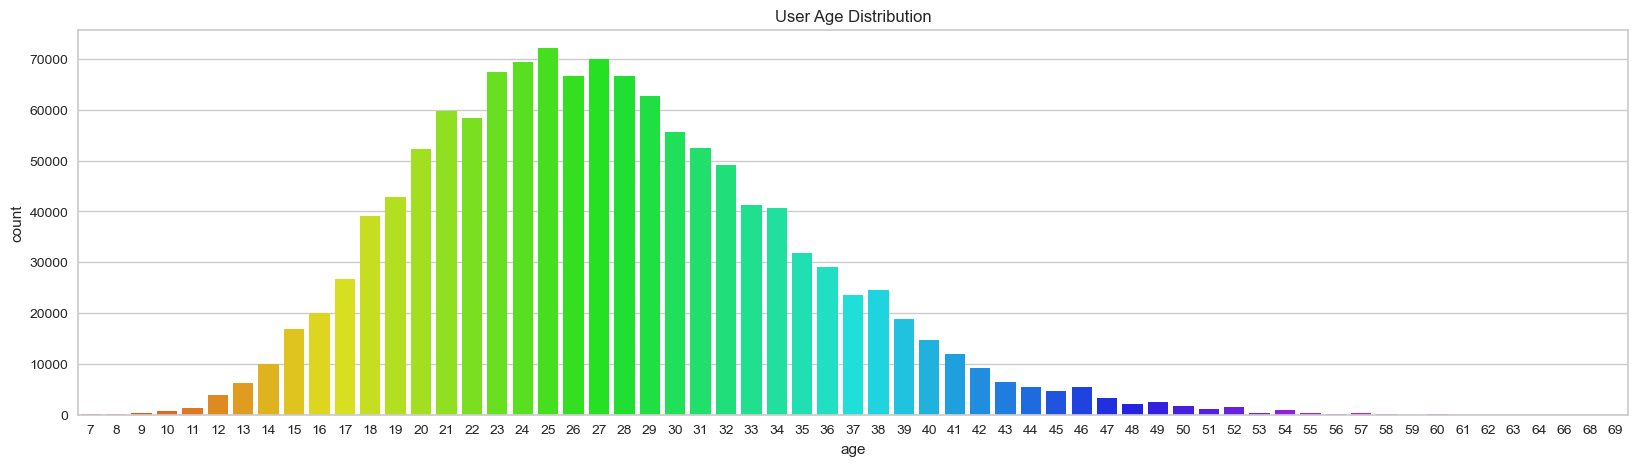

In [5]:
# 2. Age Distribution
plt.figure(figsize=(20,5))
sns.countplot(x=df['age'], palette='hsv')
plt.title('User Age Distribution')
plt.show()

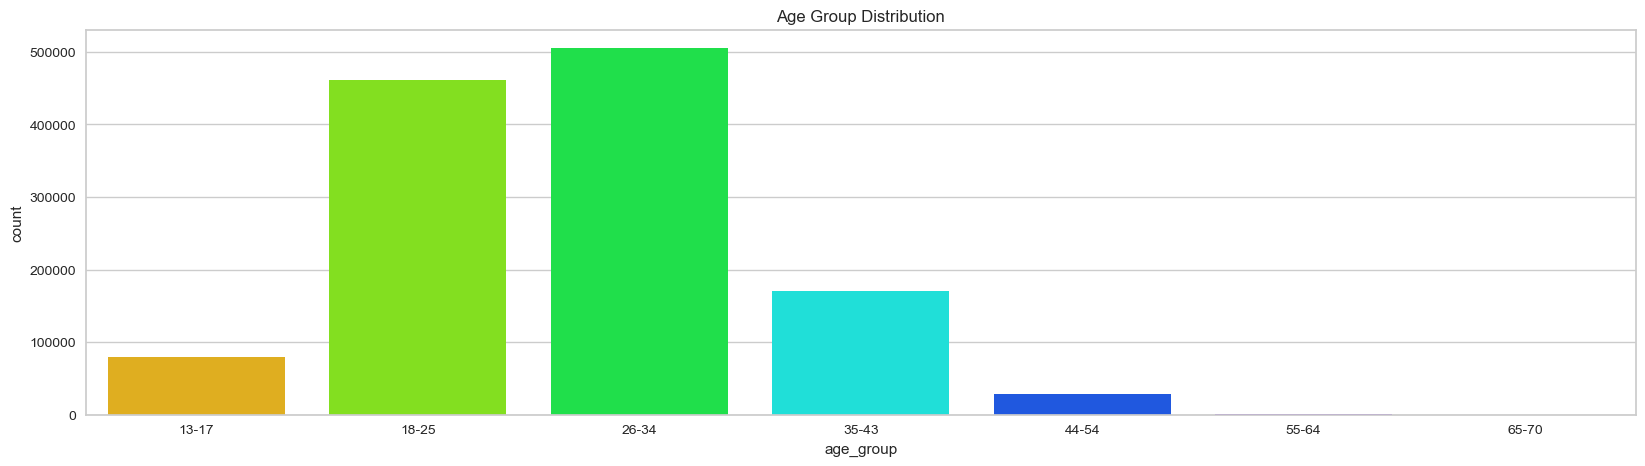

In [6]:
# sebaran berdasarkan kelompok usia
bins = [12, 17, 25, 34, 43, 54, 64, 70]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=['13-17', '18-25', '26-34', '35-43', '44-54', '55-64', '65-70'])
# buat plot
plt.figure(figsize=(20,5))
sns.countplot(x=df.age_group, palette='hsv')
plt.title('Age Group Distribution')
plt.show()

Insight: The age group that shops most frequently consists of individuals aged 26-34 years (adult group), followed by the age group of 18-25 years (young adults).

##### 3. Trend of male and female customers in purchasing gender-labeled products.

In [7]:
by_prod_gender = df.groupby(['gender', 'product_gender'])['quantity'].sum().reset_index()
by_prod_gender

,gender,product_gender,quantity
0,F,Boys,22297
1,F,Girls,16912
2,F,Men,588546
3,F,Unisex,57247
4,F,Women,494015
5,M,Boys,12702
6,M,Girls,9715
7,M,Men,334630
8,M,Unisex,32474
9,M,Women,280595


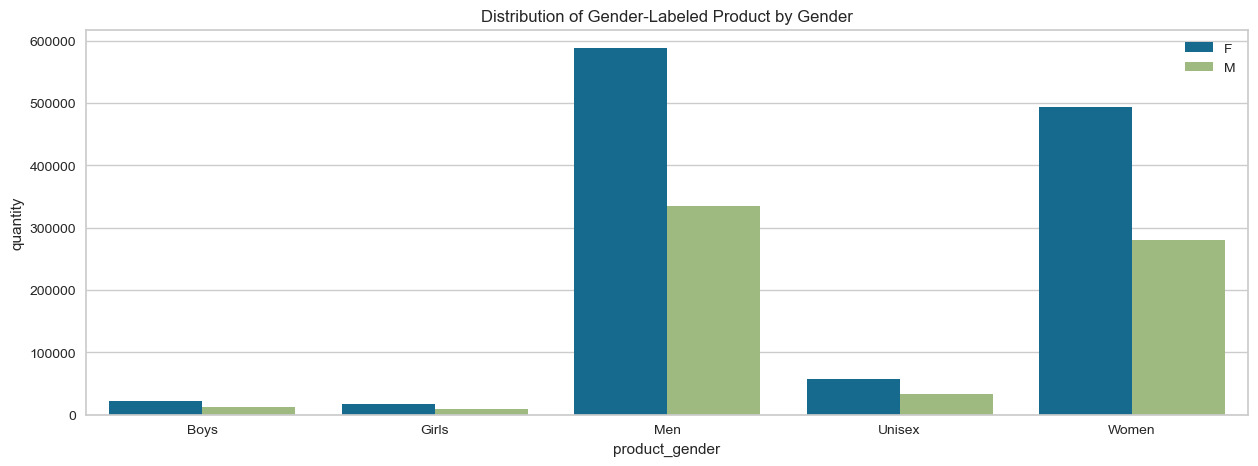

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=by_prod_gender, x='product_gender', y='quantity', orient='v', hue='gender')
plt.title('Distribution of Gender-Labeled Product by Gender')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Insight: Based on the above plot, it is observed that a significant number of female customers purchase products labeled as "Men's Product." Therefore, there is no apparent trend for each gender to exclusively buy products labeled with their corresponding gender.

##### 4. The average amount spent by female and male customers on shopping for products per product category.

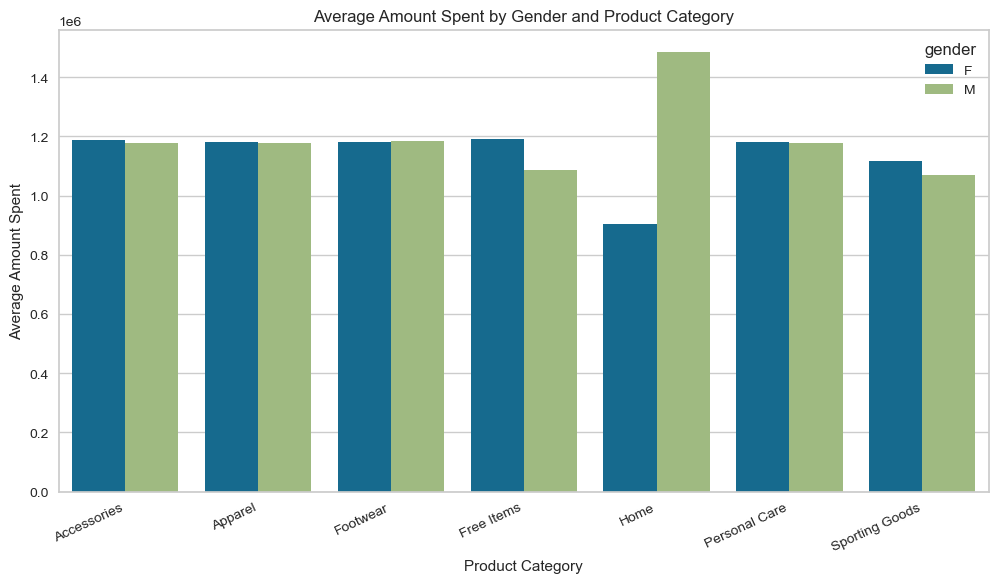

In [9]:
by_prod_cat = df.groupby(['gender', 'master_category'])['total_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='master_category', y='total_amount', hue='gender', data=by_prod_cat)
plt.title('Average Amount Spent by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

From the table above, it is evident that the highest average purchase occurs in the Home category, where female customers spend the most.

##### 5. The influence of payment method on shopping tendencies.

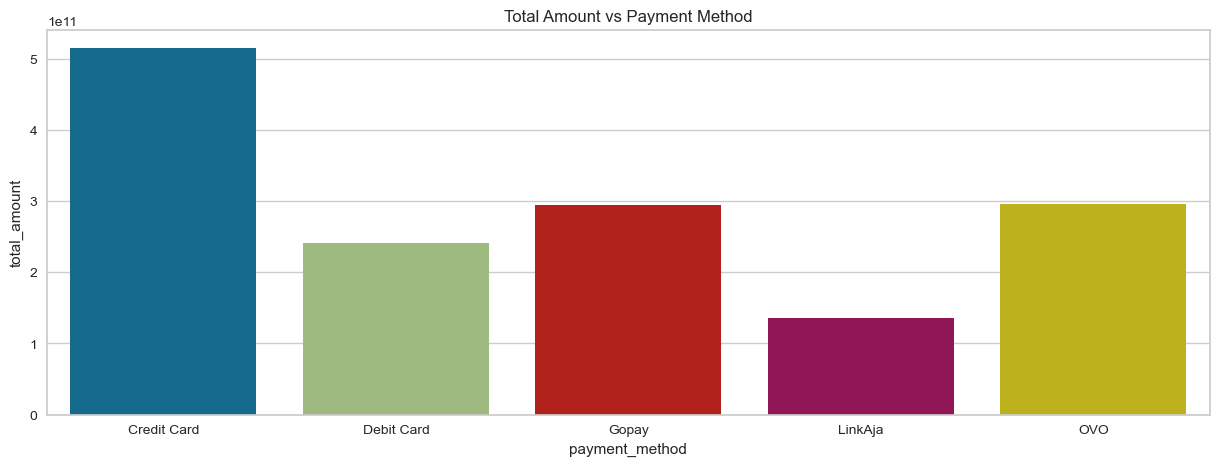

In [10]:
by_payment_method = df.groupby('payment_method')['total_amount'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=by_payment_method, x='payment_method', y='total_amount', orient='v')
plt.title('Total Amount vs Payment Method')
plt.show()

Users who utilize Credit Cards exhibit a high shopping tendency, as evidenced by their total spending. This is followed by users of OVO and Gopay.

##### 6. Total Spending based on Age Group

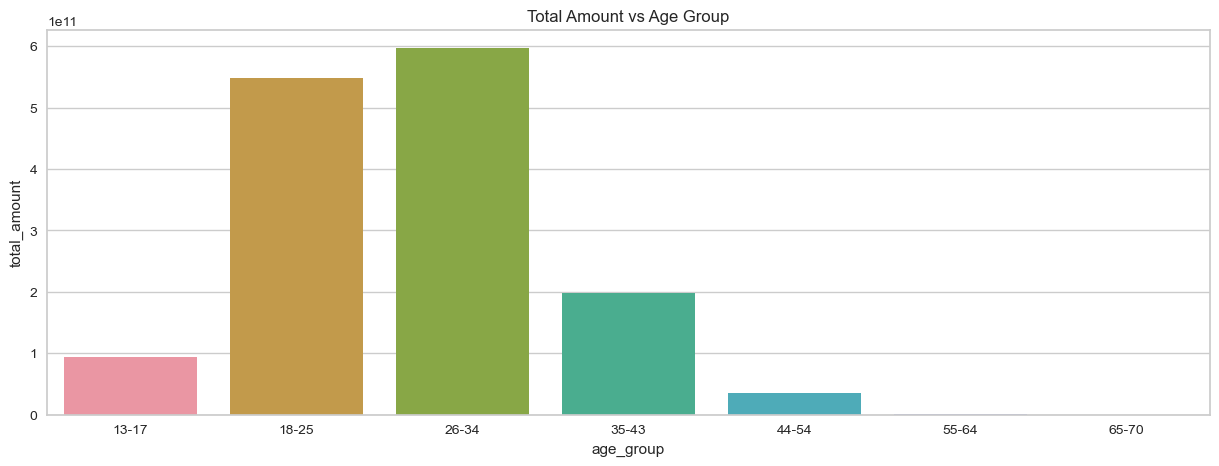

In [11]:
by_age_group = df.groupby('age_group')['total_amount'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=by_age_group, x='age_group', y='total_amount', orient='v')
plt.title('Total Amount vs Age Group')
plt.show()

##### 7. The tendency of using promotions by female and male customers.

The adult age group (26-34 years old) engages in higher spending compared to other age groups.

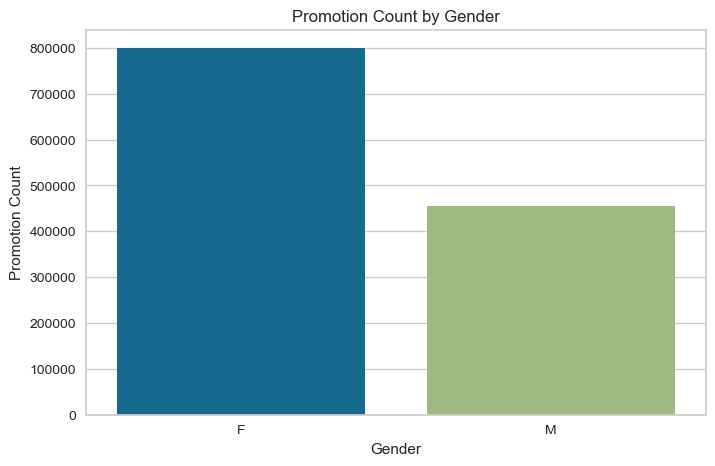

In [12]:
promo_by_gender = df.groupby('gender')['promo_amount'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='promo_amount', data=promo_by_gender)
plt.title('Promotion Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Promotion Count')
plt.show()

Male Customer used promo more than female with significant difference

### **Feature Engineering**

##### **Feature Selection**

For customer clustering, numeric data related to each user's transaction will be used for clustering model.

In [13]:
transaction = df[['customer_id','transaction_id','promo_amount', 'item_price','quantity','shipment_fee', 'total_amount']]
transaction

,customer_id,transaction_id,promo_amount,item_price,quantity,shipment_fee,total_amount
0,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,191247,1,10000,199832
1,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,0,145526,1,10000,155526
2,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,0,135174,4,10000,550696
3,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,0,271012,1,0,271012
4,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,0,198753,1,0,198753
...,...,...,...,...,...,...,...
1253521,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,0,113410,2,0,226820
1253522,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,5010,354213,1,10000,359203
1253523,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,2181,288835,4,5000,1158159
1253524,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,4503,188646,1,0,184143


it's more beneficial if the data consist of unique customer id for each row. So, the data will be grouped and aggregated.Price is actuallly for one product of each transaction. So, it cannot be aggregated. However, we can get the max_price that the customer ever bougth from it.

In [14]:
grouped_df = transaction.groupby('customer_id').agg({'transaction_id':'count',
                                                     'item_price':'max',
                                                    'quantity':'sum',
                                                    'promo_amount':'sum',
                                                    'shipment_fee':'sum',
                                                    'total_amount':'sum'}).reset_index()
grouped_df = grouped_df.rename(columns={'transaction_id':'transaction_count',
                                'quantity':'total_items',
                                'item_price':'max_price',
                                'promo_amount':'total_promo',
                                'shipment_fee':'total_shipment'})
grouped_df.head()

,customer_id,transaction_count,max_price,total_items,total_promo,total_shipment,total_amount
0,3,71,713811,88,183397,495000,45842098
1,8,8,334399,19,7699,55000,4758601
2,9,8,488514,10,0,45000,4113630
3,11,1,192025,1,9492,15000,197533
4,15,9,447347,9,16362,90000,6447246


##### **Feature Creation**

In this process, information such as average of price item, average of transaction amount, average promo and average shipment for each customer will be created. 

In [15]:
# average item price
grouped_df['avg_item_price'] = (grouped_df['total_amount'] - grouped_df['total_shipment'] - grouped_df['total_promo']) / grouped_df['total_items']

# average transaction amount
grouped_df['avg_t_amount'] = grouped_df['total_amount'] / grouped_df['transaction_count']

# average promo for each transaction
grouped_df['avg_promo'] = grouped_df['total_promo']/grouped_df['transaction_count']

# average shipment fee
grouped_df['avg_shipment'] = grouped_df['total_shipment']/grouped_df['transaction_count']
grouped_df

,customer_id,transaction_count,max_price,total_items,total_promo,total_shipment,total_amount,avg_item_price,avg_t_amount,avg_promo,avg_shipment
0,3,71,713811,88,183397,495000,45842098,513223.88,645663.35,2583.06,6971.83
1,8,8,334399,19,7699,55000,4758601,247152.74,594825.12,962.38,6875.00
2,9,8,488514,10,0,45000,4113630,406863.00,514203.75,0.00,5625.00
3,11,1,192025,1,9492,15000,197533,173041.00,197533.00,9492.00,15000.00
4,15,9,447347,9,16362,90000,6447246,704542.67,716360.67,1818.00,10000.00
...,...,...,...,...,...,...,...,...,...,...,...
50690,99992,17,399875,19,12442,180000,14033384,728470.63,825493.18,731.88,10588.24
50691,99995,79,588241,134,89595,815000,58958135,433235.37,746305.51,1134.11,10316.46
50692,99997,1,216461,1,0,10000,226461,216461.00,226461.00,0.00,10000.00
50693,99998,24,411675,33,59635,215000,70563417,2129963.09,2940142.38,2484.79,8958.33


Now, we can drop the customer_id column since we dont use it in clustering model

In [16]:
# Dropping customer_id columnd
data_final = grouped_df.drop('customer_id', axis=1)
data_final.head(3)

,transaction_count,max_price,total_items,total_promo,total_shipment,total_amount,avg_item_price,avg_t_amount,avg_promo,avg_shipment
0,71,713811,88,183397,495000,45842098,513223.88,645663.35,2583.06,6971.83
1,8,334399,19,7699,55000,4758601,247152.74,594825.12,962.38,6875.00
2,8,488514,10,0,45000,4113630,406863.00,514203.75,0.00,5625.00


##### **Missing Value Checking**

In [17]:
data_final.isna().sum()

transaction_count    0
max_price            0
total_items          0
total_promo          0
total_shipment       0
total_amount         0
avg_item_price       0
avg_t_amount         0
avg_promo            0
avg_shipment         0
dtype: int64

There is no missing value in the data.

##### **Outlier Handling**

KMeans algorithm is sensitive to outliers, so the outliers need to be handled correctly

**Outlier Detection**

In [18]:
def plot_check(df, variable):
    plt.figure(figsize=(12, 4))

    # subplot untuk histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=35)
    plt.title(f'Histogram {variable}')

    # subplot untuk boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot {variable}')

    plt.tight_layout()

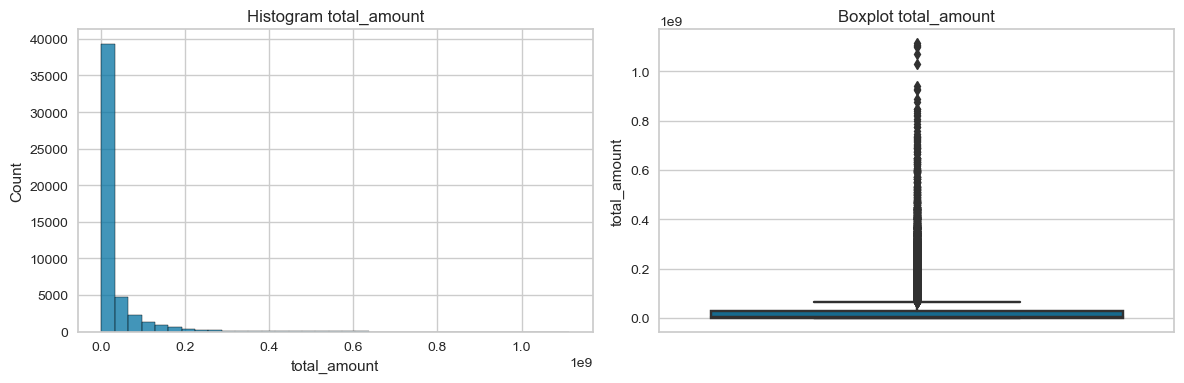

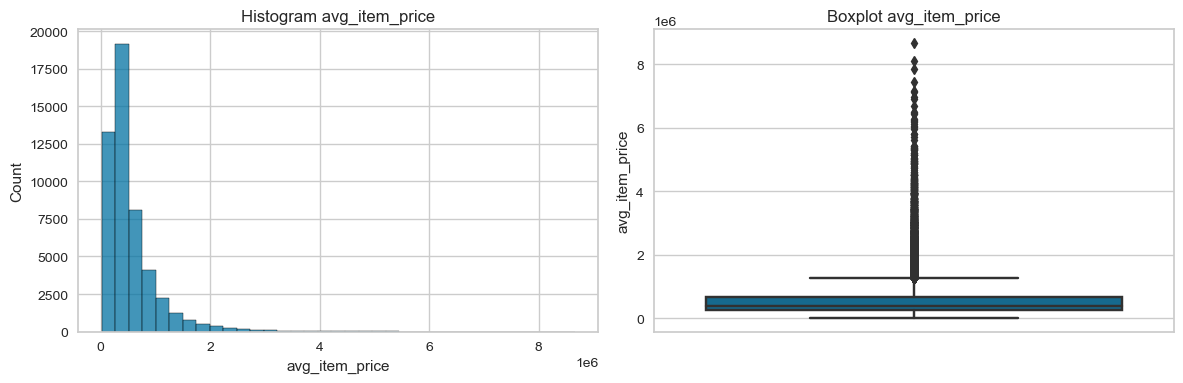

In [19]:
plot_check(data_final, 'total_amount')
plot_check(data_final, 'avg_item_price')

>From two columns as examples, the data has some outliers

For outlier handling, capping and censoring method will be used and in order to select the right method the distribution of each column will be checked. 

In [20]:
def distribution_test(dataframe):
    '''
    This function takes a dataframe as a parameter and checks the distribution of data for each of its columns.
    '''
    # Assign lists for column names with specific skewness
    normal_dist_columns = []  # List to contain columns with normal distribution
    skewed_dist_columns = []  # List to contain columns with skewed distribution
    dataframe_columns = dataframe.columns.tolist()  # List of columns in the dataframe
    for column in dataframe_columns:
        skewness = dataframe[column].skew()
        # If skewness is between -0.5 and 0.5, then the distribution is normal or close to normal
        if skewness > 0.5 or skewness < -0.5:
            skewed_dist_columns.append(column)
        # Otherwise, the data has moderate or extreme positive or negative skewness
        else:
            normal_dist_columns.append(column)

    # Print output
    print(f"Here are the columns with a normal distribution:")
    print(normal_dist_columns)
    print(f"Columns with a skewed distribution:")
    print(skewed_dist_columns)

    # Create a dataframe for output

    return normal_dist_columns, skewed_dist_columns

In [21]:
normal, skewed = distribution_test(data_final)

Here are the columns with a normal distribution:
['max_price']
Columns with a skewed distribution:
['transaction_count', 'total_items', 'total_promo', 'total_shipment', 'total_amount', 'avg_item_price', 'avg_t_amount', 'avg_promo', 'avg_shipment']


**Normal Distribution**

Capping using gaussian method will be used. We can just use the normal list above to transform only max_price. The rest of the column will remain for the next capping method

In [22]:
winsorize_norm = Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore', variables=normal)

data_final_capped_normal = winsorize_norm.fit_transform(data_final)

**Skewed distribution**

capping using iqr or interquaritile range method will be used

In [23]:
winsorize = Winsorizer(capping_method='iqr', tail='both', fold=1.3, missing_values='ignore', variables=skewed)

data_final_capped = winsorize.fit_transform(data_final_capped_normal)

##### **Scaling**

Since the data is skewed distribution, MinMaxScaler will be used to scale the data

In [24]:
scaler = MinMaxScaler()
data_final_scaled = scaler.fit_transform(data_final_capped)

### **Model Definition**

Here, we don't use PCA to reduce dimensions of the data since the components are already small.

**Elbow Method**

Elbow method is used to determine how many cluster we want to use

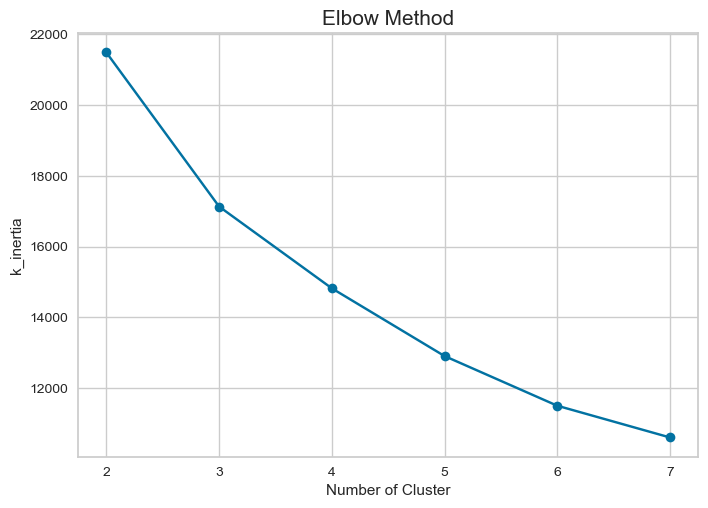

In [25]:
# list inertia
inertia = []

#looping berdasarkan range
for i in range(2, 8):
    # kmeans
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=7)
    kmeans.fit(data_final_scaled)
    
    # append value ke lis
    inertia.append(kmeans.inertia_)

# plotting hasil inertia
plt.plot(range(2, 8),inertia, marker='o')
plt.title('Elbow Method', fontsize=15)

# label
plt.xlabel("Number of Cluster")
plt.ylabel("k_inertia")
plt.show()

The elbow is not super clear here. It seems that cluster 3, 4 or 5 has the elbow. However, we are going to use shilloette score in addition to elbow method.

**Shilloette Score**

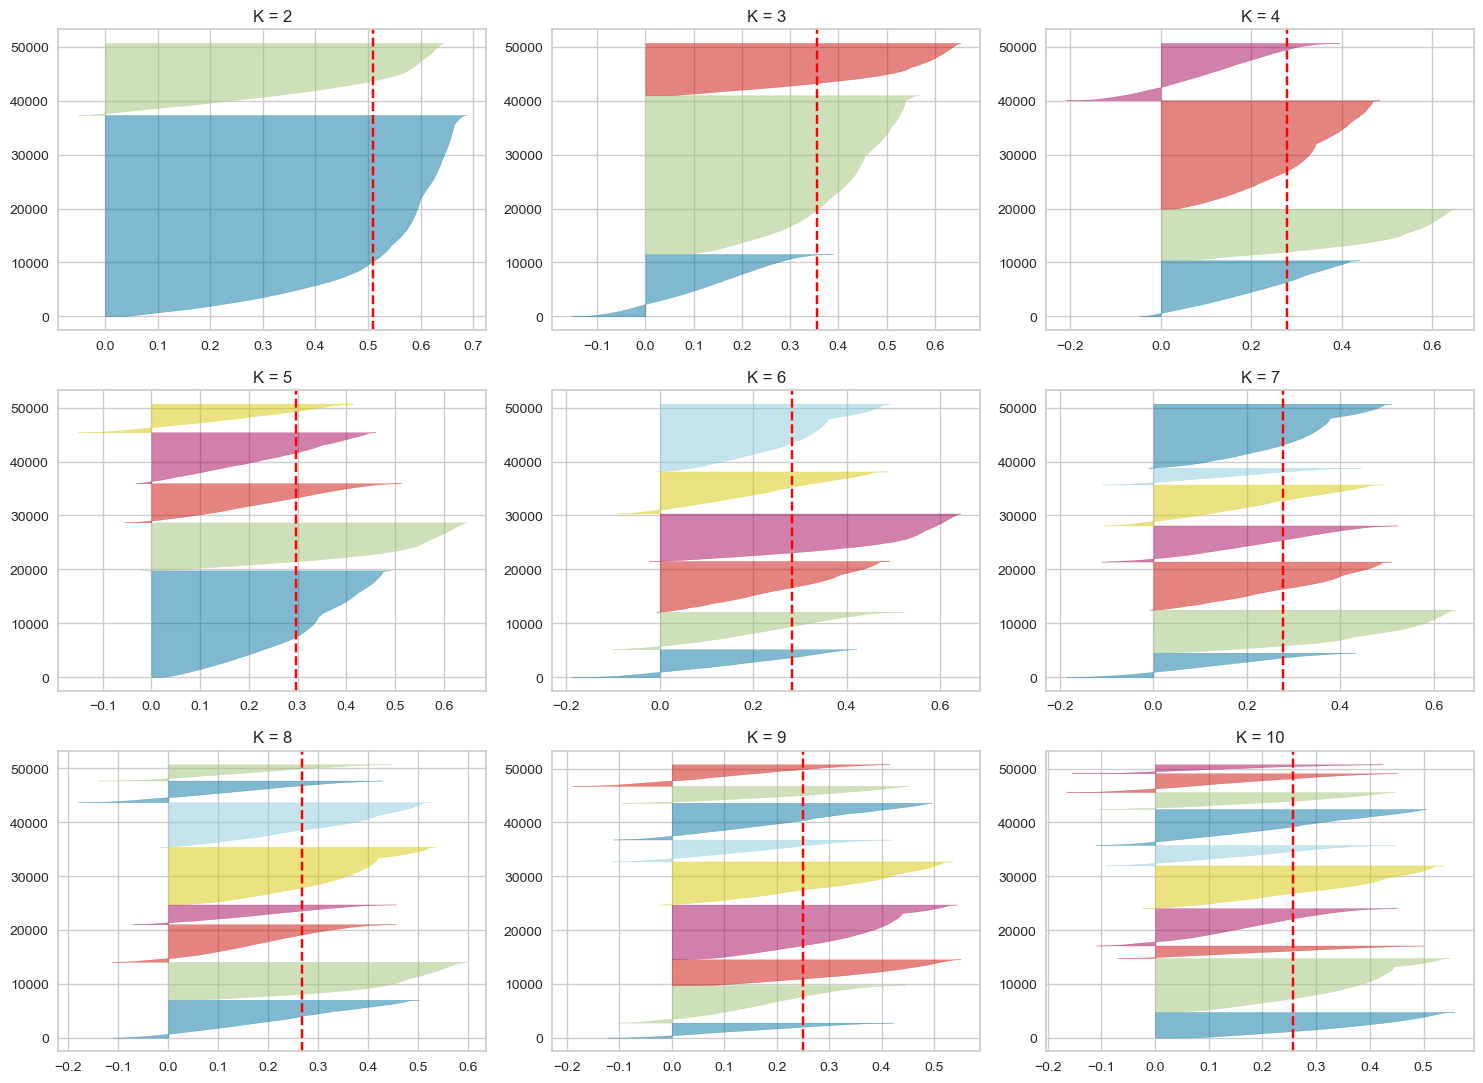

In [26]:
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 11))

# Loop subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 200, random_state = 7)

    # SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to the data 
    visualizer.fit(data_final_scaled)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
# looping berdasarkan range
for i in range(1,9):
    #kmeans
    km = KMeans(n_clusters = i+1, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 3)
    km.fit(data_final_scaled)

    # hitung dan print score shilouette
    score = silhouette_score(data_final_scaled, km.labels_, metric='euclidean')
    print(f'{i+1} cluster has Silhouette score: {score:.3f}')

2 cluster has Silhouette score: 0.510
3 cluster has Silhouette score: 0.355
4 cluster has Silhouette score: 0.278
5 cluster has Silhouette score: 0.297
6 cluster has Silhouette score: 0.282
7 cluster has Silhouette score: 0.278
8 cluster has Silhouette score: 0.269
9 cluster has Silhouette score: 0.250


Insights:
- There is no cluster with balanced shape. So, considering the balance of the shape migth not be the best approach.
- Cluster 2 the best score, however the diversity of the cluster may result to less personalized clustering.
- Considering the diversity and the shilhouette score, cluster 3 has the proportion to be used. 

### **Model Training and Prediction**

In [48]:
Kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init=10, random_state=3)
model = Kmeans.fit(data_final_scaled)
y_cluster = Kmeans.predict(data_final_scaled) # fit the kmeans

In [50]:
grouped_df['cluster'] = y_cluster
grouped_df

,customer_id,transaction_count,max_price,total_items,total_promo,total_shipment,total_amount,avg_item_price,avg_t_amount,avg_promo,avg_shipment,cluster
0,3,71,713811,88,183397,495000,45842098,513223.88,645663.35,2583.06,6971.83,2
1,8,8,334399,19,7699,55000,4758601,247152.74,594825.12,962.38,6875.00,1
2,9,8,488514,10,0,45000,4113630,406863.00,514203.75,0.00,5625.00,1
3,11,1,192025,1,9492,15000,197533,173041.00,197533.00,9492.00,15000.00,1
4,15,9,447347,9,16362,90000,6447246,704542.67,716360.67,1818.00,10000.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50690,99992,17,399875,19,12442,180000,14033384,728470.63,825493.18,731.88,10588.24,0
50691,99995,79,588241,134,89595,815000,58958135,433235.37,746305.51,1134.11,10316.46,2
50692,99997,1,216461,1,0,10000,226461,216461.00,226461.00,0.00,10000.00,1
50693,99998,24,411675,33,59635,215000,70563417,2129963.09,2940142.38,2484.79,8958.33,0


Merging Data with the original Dataframe

Here we are going to take the last payment method, device_type, age and gender

In [30]:
old_data_grouped = df.groupby('customer_id').agg({'payment_method':'max',
                                                  'device_type':'max',
                                                  'gender':'max',
                                                  'age':'max'
                                                  })

data_output = pd.merge(left=grouped_df, right=old_data_grouped, on='customer_id', how='left').drop_duplicates()

In [31]:
data_output

,customer_id,transaction_count,max_price,total_items,total_promo,total_shipment,total_amount,avg_item_price,avg_t_amount,avg_promo,avg_shipment,cluster,payment_method,device_type,gender,age
0,3,71,713811,88,183397,495000,45842098,513223.88,645663.35,2583.06,6971.83,2,OVO,Android,M,37
1,8,8,334399,19,7699,55000,4758601,247152.74,594825.12,962.38,6875.00,1,OVO,Android,F,23
2,9,8,488514,10,0,45000,4113630,406863.00,514203.75,0.00,5625.00,1,Gopay,Android,F,17
3,11,1,192025,1,9492,15000,197533,173041.00,197533.00,9492.00,15000.00,1,OVO,Android,M,30
4,15,9,447347,9,16362,90000,6447246,704542.67,716360.67,1818.00,10000.00,1,LinkAja,Android,F,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50690,99992,17,399875,19,12442,180000,14033384,728470.63,825493.18,731.88,10588.24,0,OVO,Android,F,39
50691,99995,79,588241,134,89595,815000,58958135,433235.37,746305.51,1134.11,10316.46,2,OVO,Android,F,18
50692,99997,1,216461,1,0,10000,226461,216461.00,226461.00,0.00,10000.00,1,Gopay,iOS,M,19
50693,99998,24,411675,33,59635,215000,70563417,2129963.09,2940142.38,2484.79,8958.33,0,Debit Card,Android,F,9


##### **EDA after Clustering** on Each User

1. Cluster Percentage

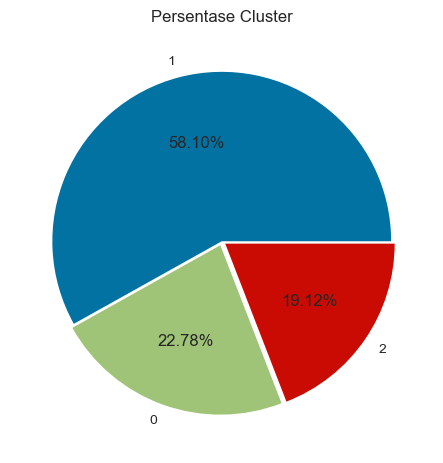

In [32]:
cluster_count=data_output['cluster'].value_counts() #buat value counts 
plt.pie(cluster_count,autopct='%1.2f%%', labels=cluster_count.index,explode=[0,0.025,00.025]) # tampilkan pie chart
plt.title('Persentase Cluster')
plt.show()

It seems cluster 1 has dominated the distribution of the data.

2. Average of Total Amount

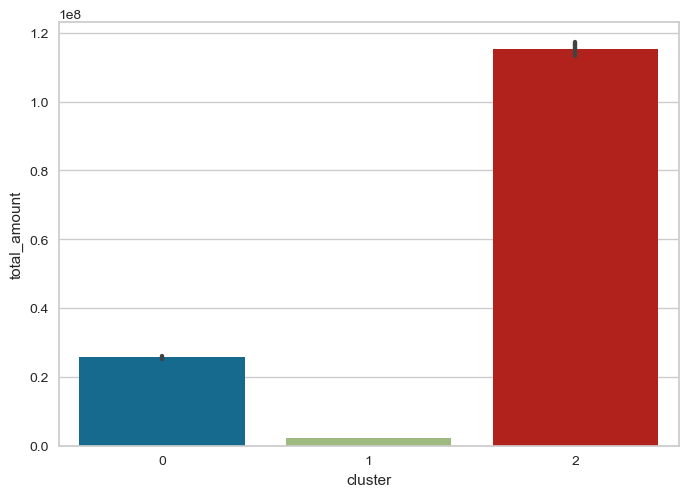

In [33]:
sns.barplot(data_output, x='cluster', y='total_amount', dodge=True, estimator='mean') #bar plot
plt.show()

Cluster 2 has the most spending among other cluster, while cluster 1 has the least total amount. Cluster 2 could be categorized as the most consumtive customers.

3. Transaction Count of Each Cluster

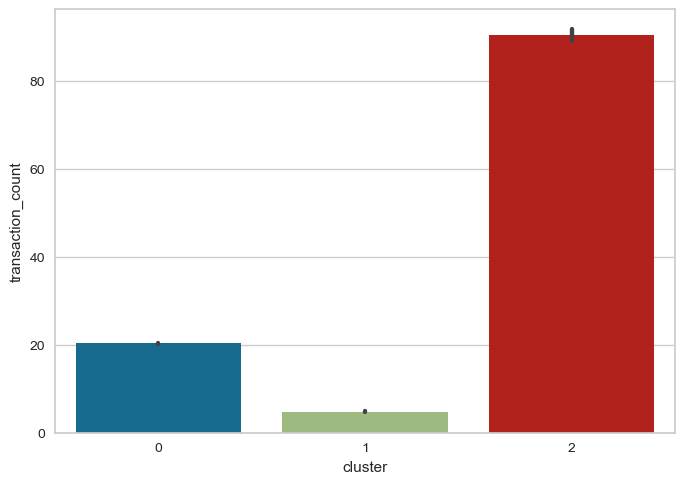

In [51]:
ax=sns.barplot(data_output, x='cluster', y='transaction_count', dodge=True, estimator='mean') #bar plot
plt.show()

From the chart above, we can also see that on average, cluster 2 has the highest average of transaction count followed by cluster 0 and 1.

4. Average Transaction Amount

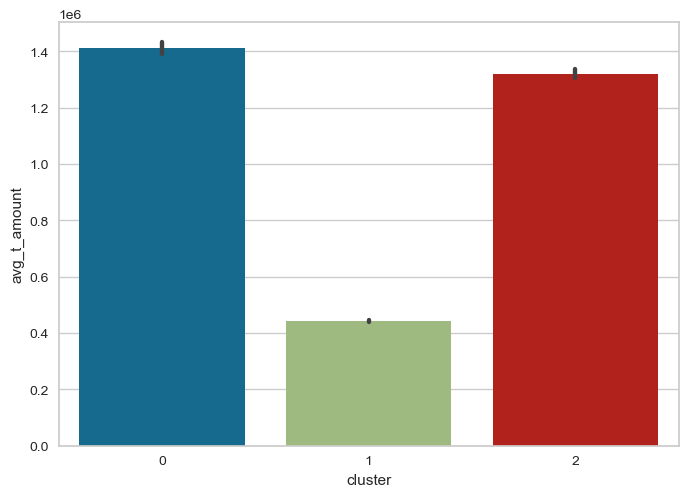

In [54]:
ax=sns.barplot(data_output, x='cluster', y='avg_t_amount', dodge=True, estimator='mean') #bar plot
plt.show()

While in average of transaction amount, cluster 0 seems to have higher number compared to the other cluster. Cluster 2 has less transaction count yet they have the highest average of amount per transaction.

5. Cluster distribution based on relationship Between total_amount and other variables

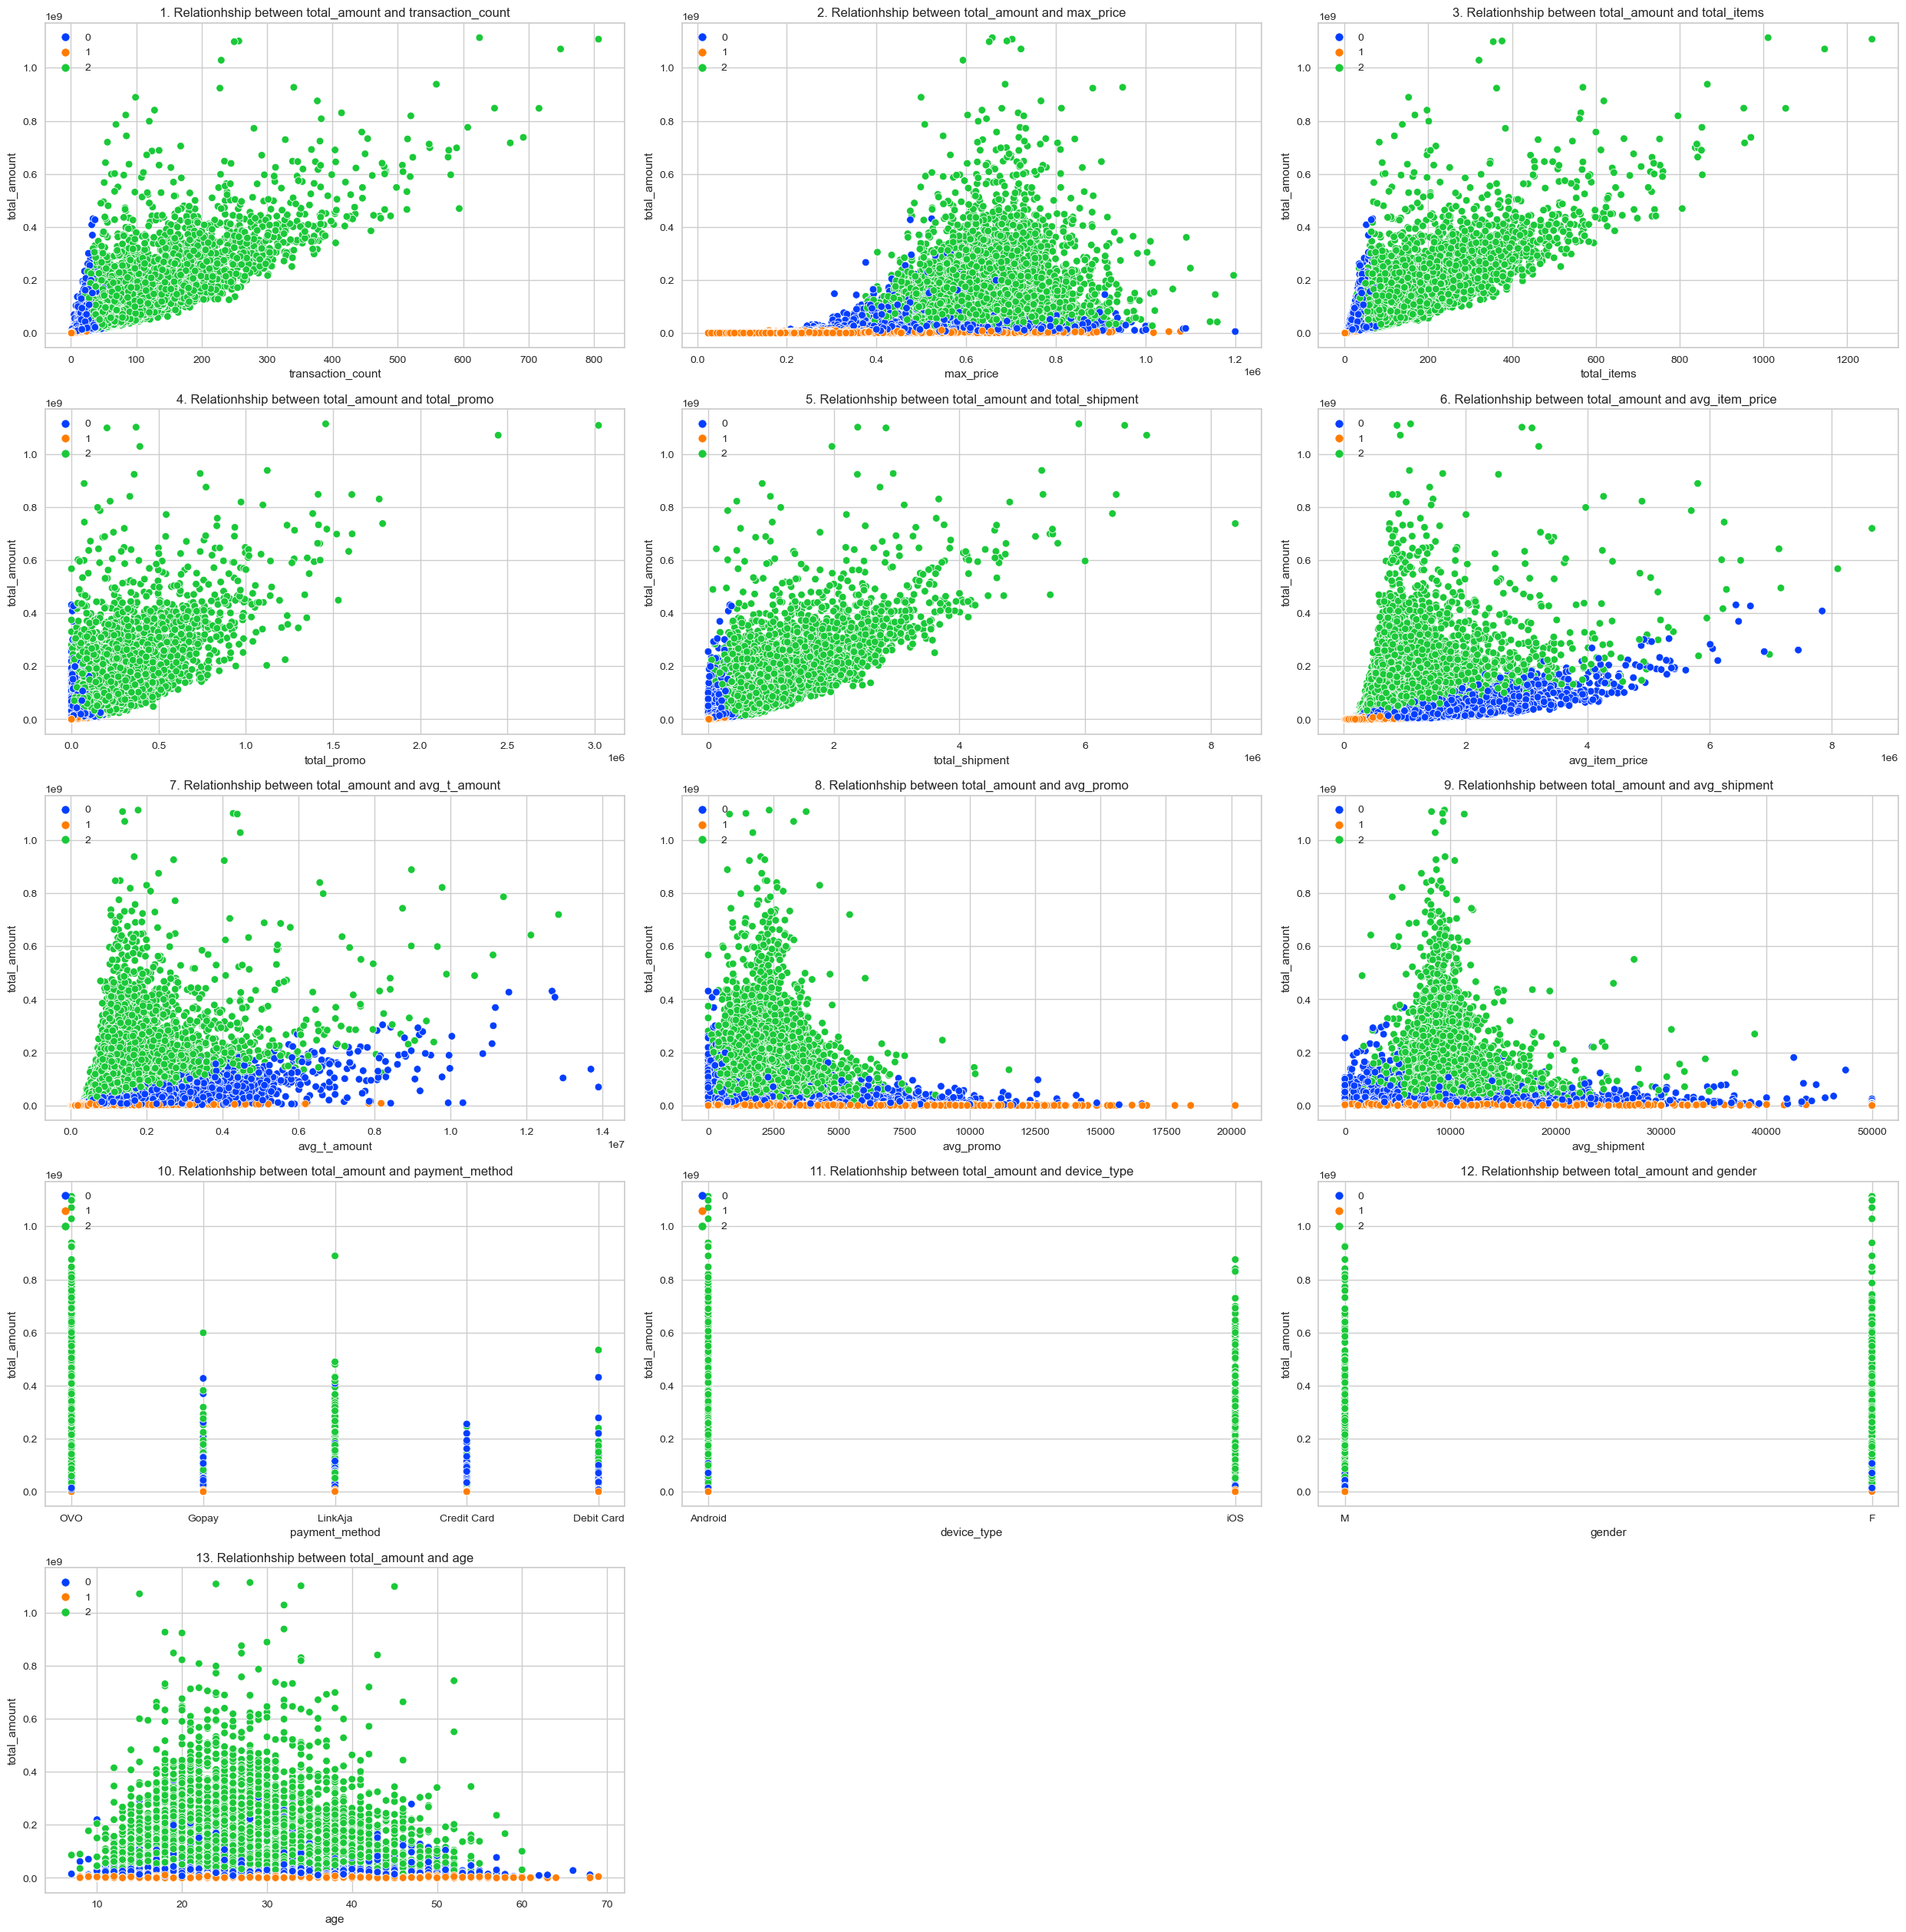

In [56]:
# visualisasi scatterplot dalam subplot
columns = data_output.columns.tolist()
columns.remove('customer_id')
columns.remove('total_amount')
columns.remove('cluster')

plt.figure(figsize=(25,35))
for i,v in enumerate(columns):
    plt.subplot(7,3,i+1)
    sns.scatterplot(data_output, x=v, y='total_amount', hue='cluster', palette='bright')
    plt.title(f"{i+1}. Relationhship between total_amount and {v}")
    plt.legend(loc=2)
plt.tight_layout()

Insights:

**Cluster 0: Moderate Spenders**
- Cluster 0 exhibits moderate spending patterns, with a total_amount lower than Cluster 1 but higher than Cluster 2. The average total transaction is below 100 transactions.
- The maximum price of items purchased in Cluster 0 shows a relatively even distribution, ranging from low to high prices. However, the total number of items purchased is relatively low.
- Average prices of items, average transaction amounts, average shipment costs, and average promo amounts in Cluster 0 indicate similar traits, with relatively high values. This suggests a tendency to buy more expensive items, particularly when there are higher promo amounts.

**Cluster 1: Frugal Shoppers**
- Cluster 1 has the lowest transaction count and total items, but a relatively even distribution of the maximum price of items.
- Despite the low total items, Cluster 1 shows an even distribution in average promo and shipment amounts. Notably, the average promo for Cluster 1 is the highest among all clusters.
- Some instances in Cluster 1 exhibit a relatively low maximum price of items, although the distribution is even.

**Cluster 2: High-Spending Enthusiasts**
- Cluster 2 stands out with the highest total amount of spending, transaction count, total items, total promo, and total shipment among other clusters. Transaction counts range from around 50 to 800 transactions.
- Despite the high total promo, Cluster 2 has a slightly lower average transaction amount and average item price compared to other clusters.
- The average promo in Cluster 2 is lower than in other clusters, suggesting that high spending is not solely driven by promotional offers.

These clusters provide insights into the diverse spending behaviors within the dataset, ranging from moderate spenders with diverse preferences (Cluster 0) to frugal shoppers with varied preferences (Cluster 1) and high-spending enthusiasts with varied preferences (Cluster 2). Each cluster reflects a distinct segment of the customer base, contributing to a nuanced understanding of their purchasing tendencies.

### **Model Evaluation**

**Inertia or within-cluster sum of squares (WCSS)**

In [59]:
model.inertia_

17133.713570924094

The result of the inertia analysis in the K-means algorithm is 17133.71. Inertia or WCSS (Within-Cluster Sum of Squares) measures how far data points in our dataset are spread from the formed cluster centers. The smaller the inertia value, the denser and more concentrated the formed clusters are. A higher inertia value indicates that data points are more spread out, and the clusters are less compact.

In [60]:
score = silhouette_score(data_final_scaled, model.labels_, metric='euclidean') #ambil score
print(f'Silhouette score: {score:.3f}')

Silhouette score: 0.355


The Silhouette score ranges from -1 to 1, with higher values indicating better clustering quality. The interpretation of the Silhouette score is as follows:

- If the Silhouette score approaches 1, it indicates that each data point is well placed in its own cluster and far from other clusters. This is a sign of excellent clustering.
- If the Silhouette score approaches 0, it means some data points might be close to the boundary between two clusters or possibly placed in the wrong cluster. This indicates overlap or uncertainty in clustering.
- If the Silhouette score approaches -1, it signifies that most data points are placed in the wrong cluster.

In this case, a score of 0.355 indicates relatively good and optimal clustering among the existing number of clusters.

Model Weaknesses

The selected clusters do not exhibit very high segmentation diversity. This may lead to less specific segmentation, resulting in less personalized recommendations for each customer type. However, the choice of 3 clusters is considered the most rational number of clusters.

### **Model Saving**

In [66]:
joblib.dump(scaler, 'deployment/scaler.pkl')

joblib.dump(model, 'deployment/kmeans.pkl')

['kmeans.pkl']

**Pipeline**

In [71]:
columns = ['max_price','transaction_count', 'total_items', 'total_promo', 'total_shipment', 'total_amount', 'avg_item_price', 'avg_t_amount', 'avg_promo', 'avg_shipment']  # List kolom numerical


# load scaler, encoder dan model 
scaler_num = joblib.load('scaler.pkl')
model_kmeans = joblib.load('kmeans.pkl')

# membuat transformer kolom
# scaler
numerical_transformer = Pipeline([
    ('scaler', scaler_num)])

# mengkombinasikan scaler dan encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, columns)])
preprocessor.fit(data_final_capped)
# buat pipeline final dengan menggunakan preprocessing dan model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model_kmeans)
])

joblib.dump(pipeline, 'deployment/pipeline.pkl')

['pipeline.pkl']

### **Conclusion**

Recommendation for each Cluster

**Cluster 0: Moderate Spenders**
- Personalized Promotions: Offer targeted promotions to encourage spending, especially for more expensive items.
- Bundle Deals: Create bundled offers or discounts to increase the number of items purchased per transaction.
- Premium Product Recommendations: Recommend premium or higher-priced products to align with the tendency to buy more expensive items.

**Cluster 1: Frugal Shoppers**
- Exclusive Promotions: Provide exclusive and high-value promotions to entice purchases given the lower transaction count.
- Budget-Friendly Recommendations: Suggest budget-friendly items or highlight sale items to attract price-sensitive customers.
- Reward Programs: Introduce loyalty or reward programs to encourage repeat purchases and retain customers.

**Cluster 2: High-Spending Enthusiasts**
- VIP Treatment: Offer exclusive benefits or early access to new products for high-spending customers.
- Loyalty Rewards: Implement a tiered loyalty program with special rewards for top spenders within the cluster.
- Personal Shopping Experience: Provide a personalized shopping experience, such as tailored recommendations and priority customer service.